In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

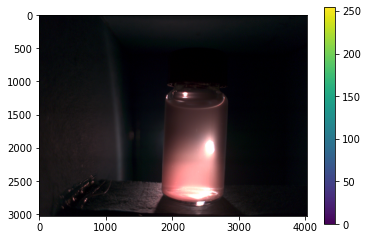

(<matplotlib.image.AxesImage at 0x7f60fc0a1790>,
 None)

In [2]:
img = cv.imread('/content/20220425_143628.png')
#cv2_imshow(img)
plt.imshow(img),plt.colorbar(),plt.show()

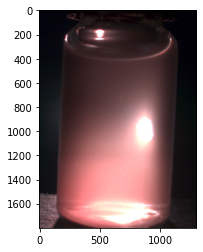

(1800, 1300, 3)


In [5]:
cropped_image = img[1000:2800, 1700:3000]
#cv2_imshow(cropped_image)
plt.imshow(cropped_image),plt.show()
print(cropped_image.shape)

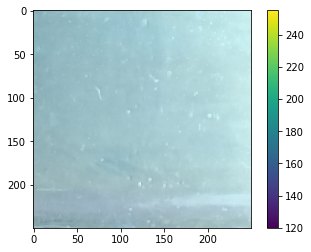

(250, 250, 3)


True

In [ ]:
scale_percent = 50
width = int(cropped_image.shape[1] * scale_percent / 100)
height = int(cropped_image.shape[0] * scale_percent / 100)

dsize = (width, height)
resized = cv.resize(cropped_image, dsize, interpolation= cv.INTER_LINEAR)
#cv2_imshow(resized)
plt.imshow(resized),plt.colorbar(),plt.show()
print(resized.shape)
cv.imwrite('/content/ROI_resized.jpg', resized)

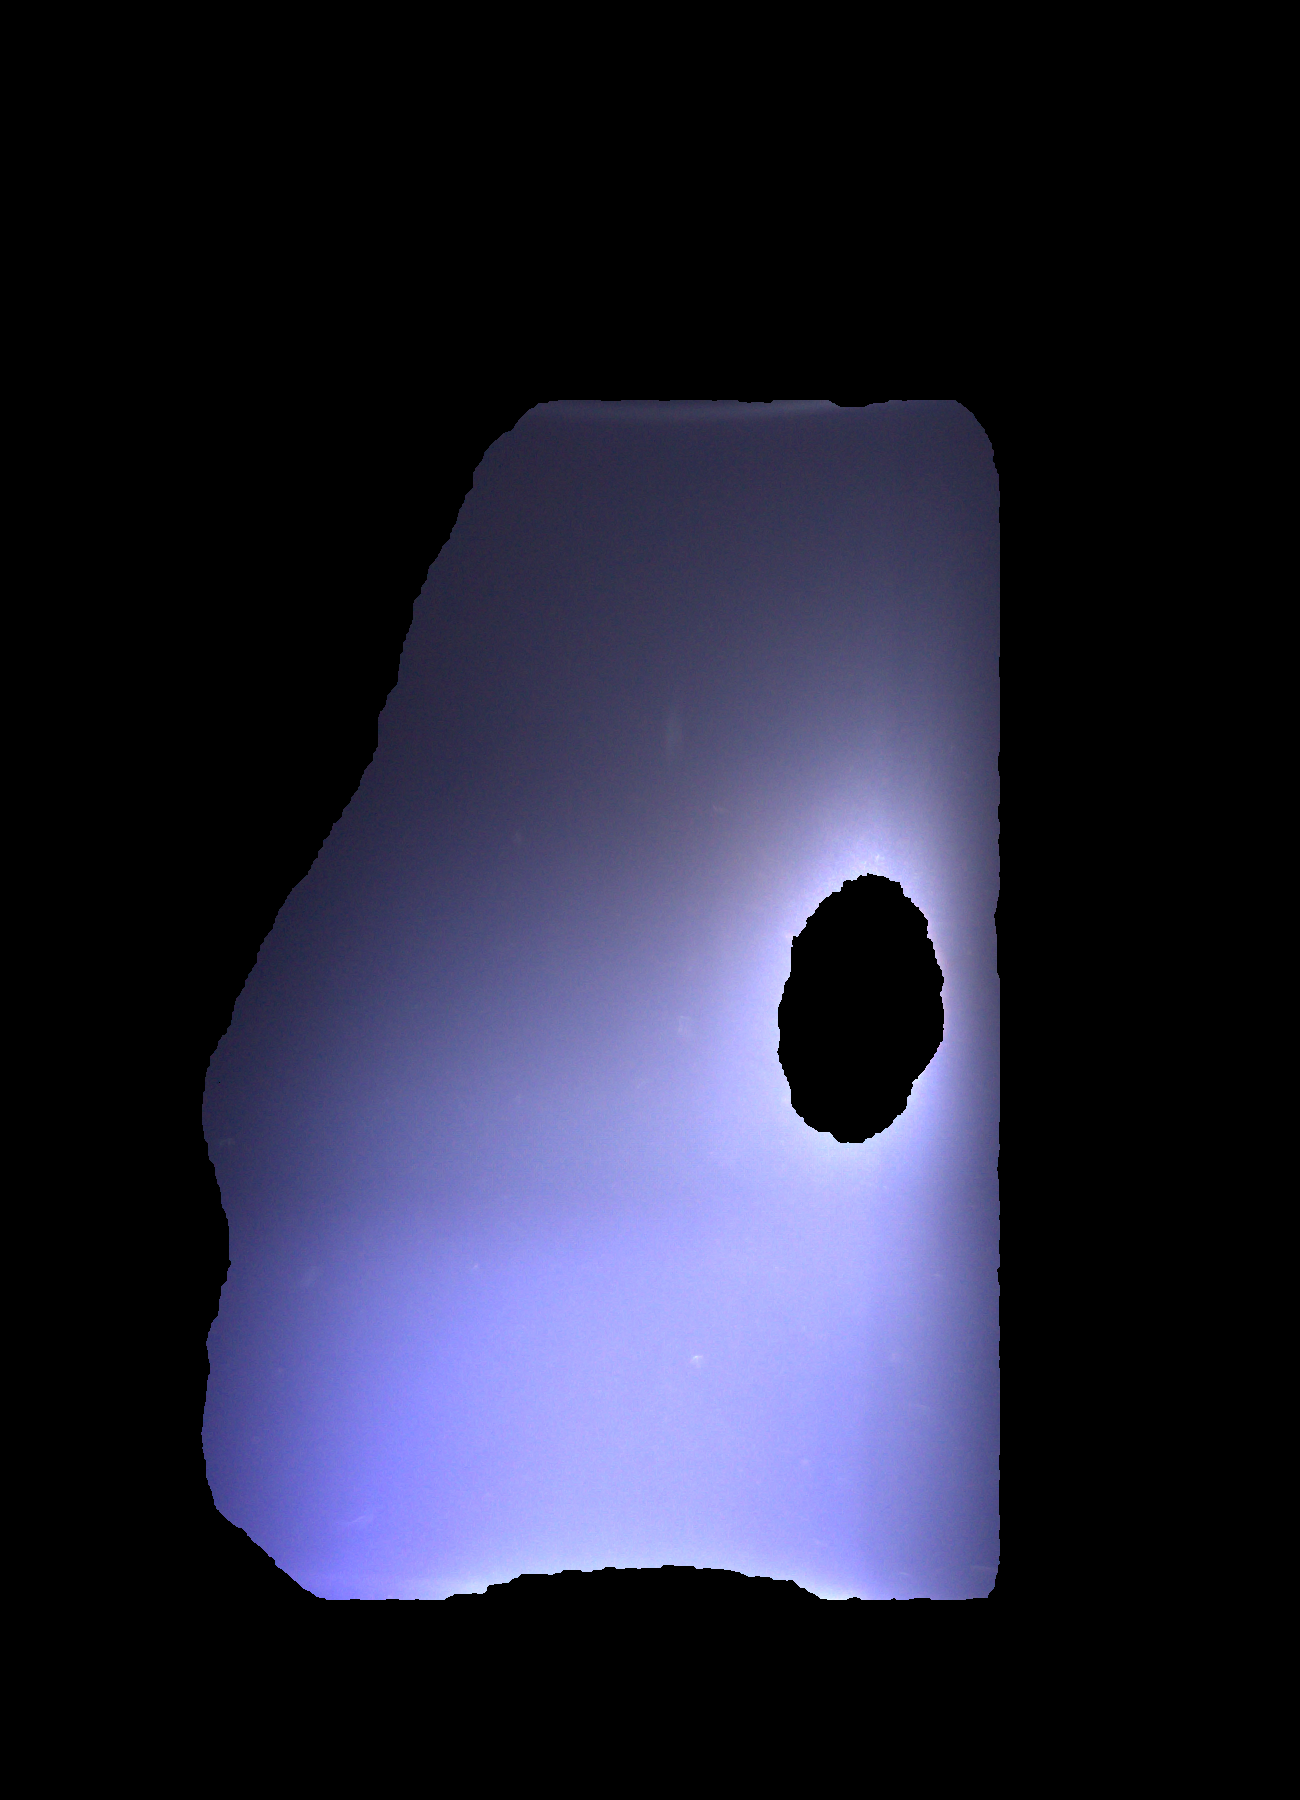

In [7]:
image = cropped_image
mask = np.zeros(image.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (200,400,800,1200)
cv.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
newimg = image*mask2[:,:,np.newaxis]
cv2_imshow(newimg)
#plt.imshow(newimg),plt.show()